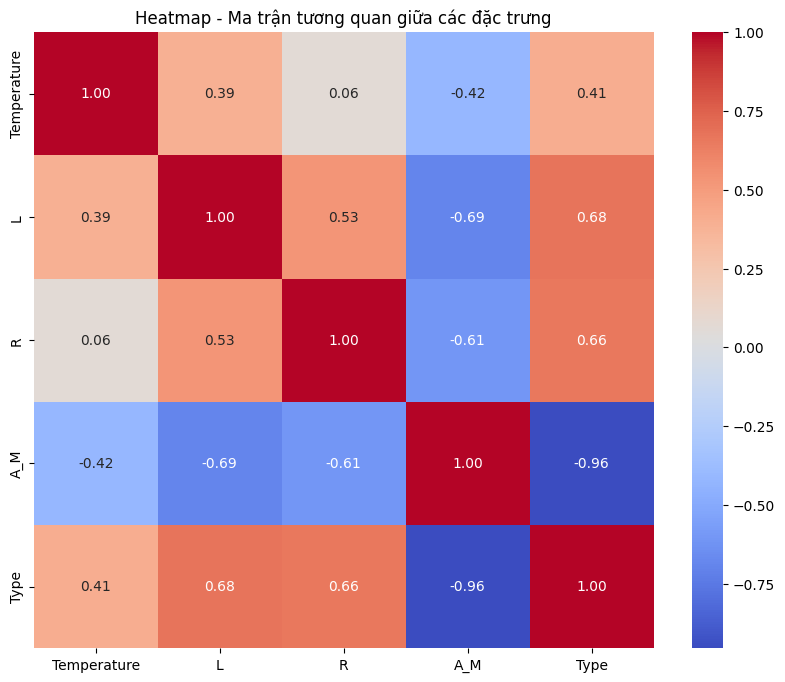

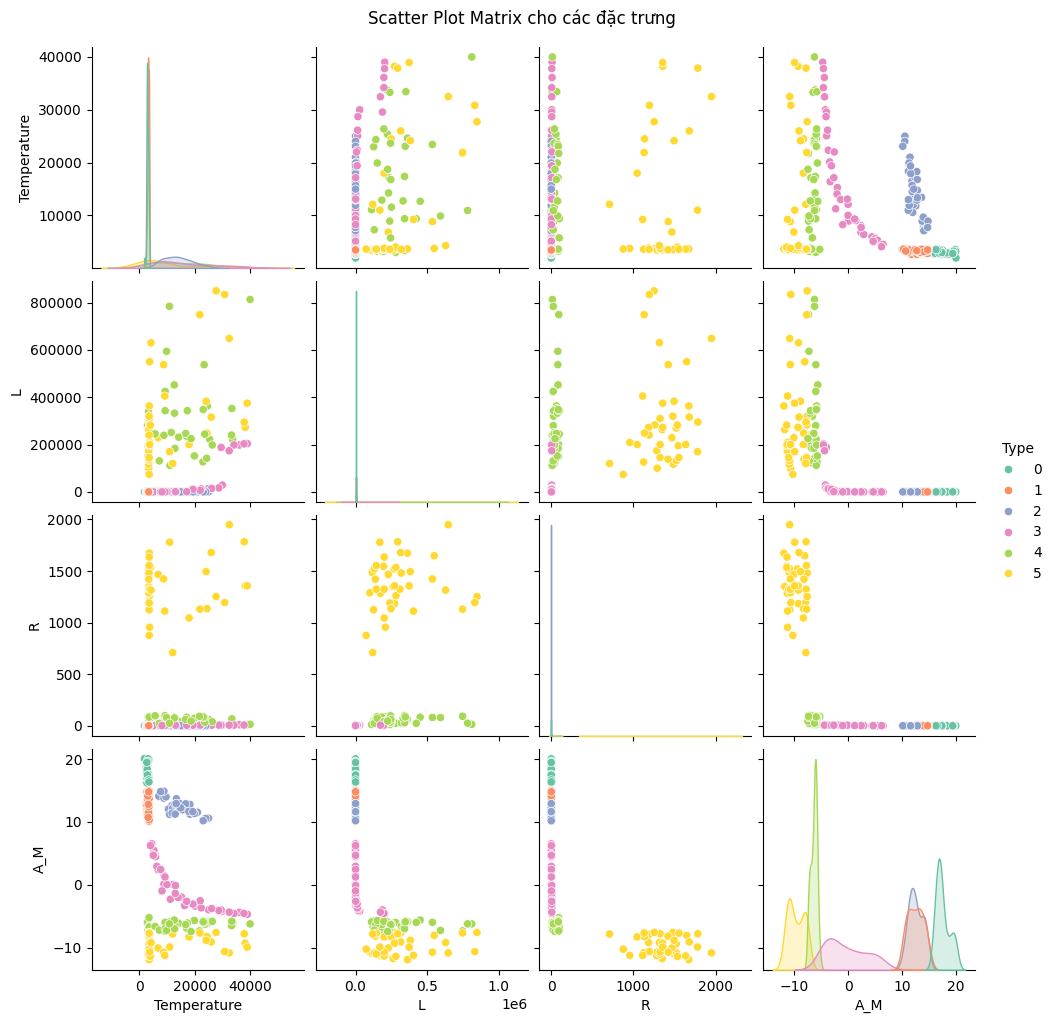

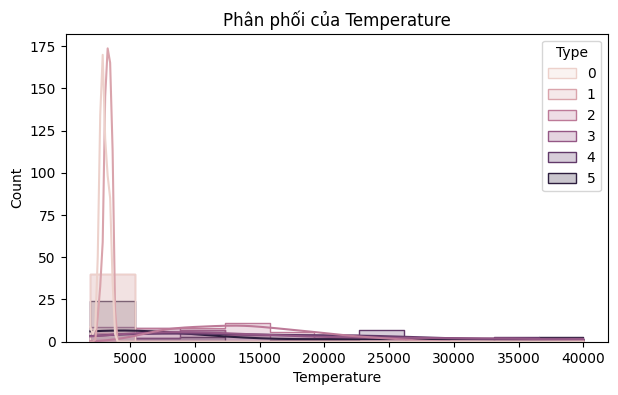

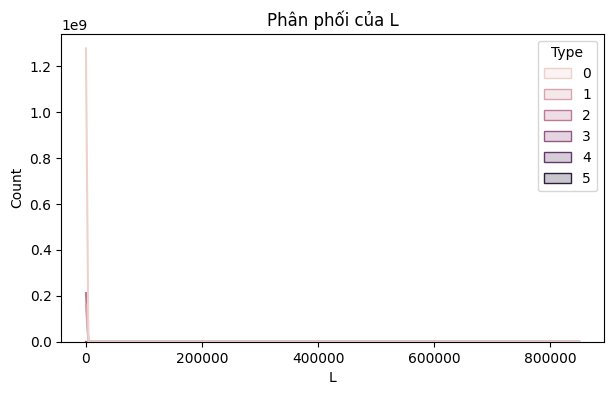

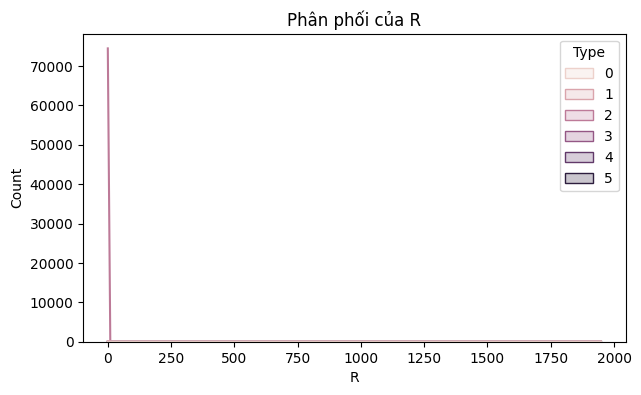

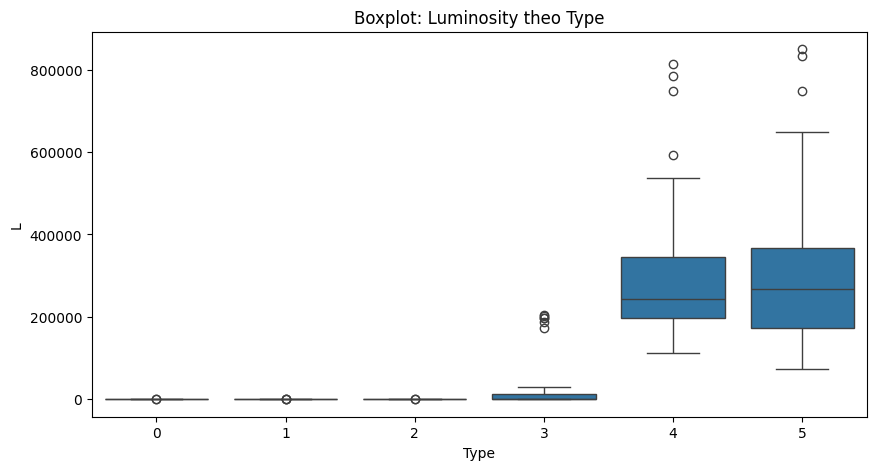

/tmp/ipykernel_146016/3249900583.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Type', y='R', palette='muted')


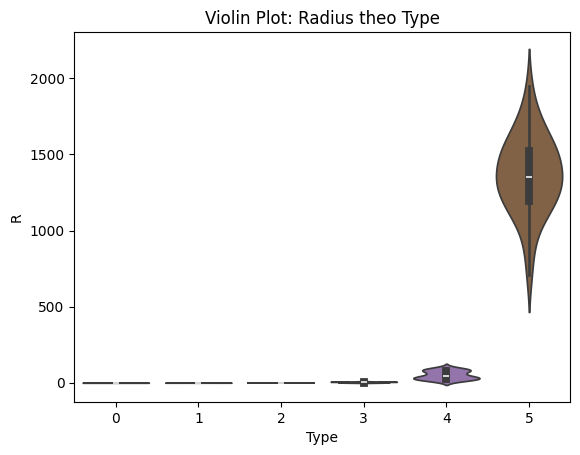

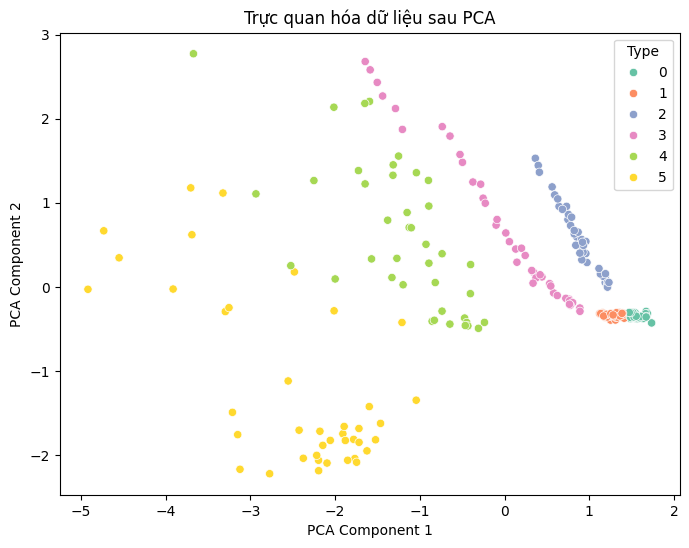

Variance Inflation Factor (VIF) cho từng đặc trưng:
       feature       VIF
0  Temperature  1.371355
1            L  2.086649
2            R  1.810867
3          A_M  2.558650


In [4]:
# Star Dataset - Exploratory Data Analysis (EDA) & Feature Correlation
# --------------------------------------------------------
# Tác giả: ChatGPT & User
# Mục tiêu: Phân tích dữ liệu tập sao để tìm mối quan hệ giữa các biến
# --------------------------------------------------------

# Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('/home/aaronpham5504/personalFolder/MSA/Project/MSA-Vstatis/Data/Stars.csv', encoding='ascii')

# --------------------------------------------------------
# 1. Ma trận tương quan giữa các đặc trưng (Correlation Matrix)
# --------------------------------------------------------
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap - Ma trận tương quan giữa các đặc trưng")
plt.show()

# --------------------------------------------------------
# 2. Pairplot (Scatter Plot Matrix)
# --------------------------------------------------------
selected_features = ['Temperature', 'L', 'R', 'A_M']
sns.pairplot(df[selected_features + ['Type']], hue='Type', diag_kind='kde', palette='Set2')
plt.suptitle("Scatter Plot Matrix cho các đặc trưng", y=1.02)
plt.show()

# --------------------------------------------------------
# 3. Biểu đồ phân phối
# --------------------------------------------------------

# a. Histogram + KDE
for col in ['Temperature', 'L', 'R']:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='Type', kde=True, element='step')
    plt.title(f'Phân phối của {col}')
    plt.show()

# b. Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Type', y='L')
plt.title("Boxplot: Luminosity theo Type")
plt.show()

# c. Violin Plot
sns.violinplot(data=df, x='Type', y='R', palette='muted')
plt.title("Violin Plot: Radius theo Type")
plt.show()

# --------------------------------------------------------
# 4. Giảm chiều bằng PCA để trực quan hóa
# --------------------------------------------------------

X = df[['Temperature', 'L', 'R', 'A_M']]
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("Trực quan hóa dữ liệu sau PCA")
plt.show()

# --------------------------------------------------------
# 5. Phân tích đa cộng tuyến (VIF)
# --------------------------------------------------------

X_vif = pd.DataFrame(X_scaled, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("Variance Inflation Factor (VIF) cho từng đặc trưng:")
print(vif_data)
